<a href="https://colab.research.google.com/github/Bhushan0097/01.CAPSTONE-Hotel-Bookings-Data-Analysis/blob/main/Notebook/Netflix_Movies_and_TV_Shows_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name**    - Netflix Movies and TV Shows: Clustering



##### **Project Type**    - Unsupervised
##### **Contribution**    - Individual
##### **Team Member 1 -** Buddhabhushan Nagrale
##### **Team Member 2 -**
##### **Team Member 3 -**
##### **Team Member 4 -**

# **Project Summary -**

Write the summary here within 500-600 words.

# **GitHub Link -**

https://github.com/Bhushan0097/04.CAPSTONE.UnsupervisedML-Netflix-Movies-and-TV-Shows-Clustering

# **Problem Statement**


**Write Problem Statement Here.**

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required.
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits.
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule.

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [155]:
# Import Libraries

import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from tabulate import tabulate

### Dataset Loading

In [156]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [157]:
# Load Dataset

path = '/content/gdrive/MyDrive/AlmaBetter/Module 6 Machine Learning/Capstone Project - UnSupervised'

Netflix_df = pd.read_csv(path + '/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv' , encoding='utf-8')

### Dataset First View

In [158]:
# Dataset First Look
Netflix_df

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,"August 14, 2020",2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,s2,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,"December 23, 2016",2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,s3,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,"December 20, 2018",2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,s4,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,"November 16, 2017",2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,s5,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,"January 1, 2020",2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...
...,...,...,...,...,...,...,...,...,...,...,...,...
7782,s7783,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...","October 19, 2020",2005,TV-MA,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...
7783,s7784,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,"March 2, 2019",2015,TV-14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...
7784,s7785,Movie,Zulu Man in Japan,NaN,Nasty C,NaN,"September 25, 2020",2019,TV-MA,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast..."
7785,s7786,TV Show,Zumbo's Just Desserts,NaN,"Adriano Zumbo, Rachel Khoo",Australia,"October 31, 2020",2019,TV-PG,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...


### Dataset Rows & Columns count

In [159]:
# Dataset Rows & Columns count

print('No of Rows    : ',Netflix_df.shape[0])
print('No of Columns : ',Netflix_df.shape[1])

No of Rows    :  7787
No of Columns :  12


### Dataset Information

In [160]:
# Dataset Info
Netflix_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


#### Duplicate Values

In [161]:
# Dataset Duplicate Value Count

print(f'Total Number of Duplicate Records found : {Netflix_df.duplicated(keep=False).sum()}')

Total Number of Duplicate Records found : 0


#### Missing Values/Null Values

In [162]:
# Missing Values/Null Values Count

print(" Count total NaN at each column in a DataFrame : \n")
null_count = Netflix_df.isnull().sum()
print(null_count)

 Count total NaN at each column in a DataFrame : 

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64


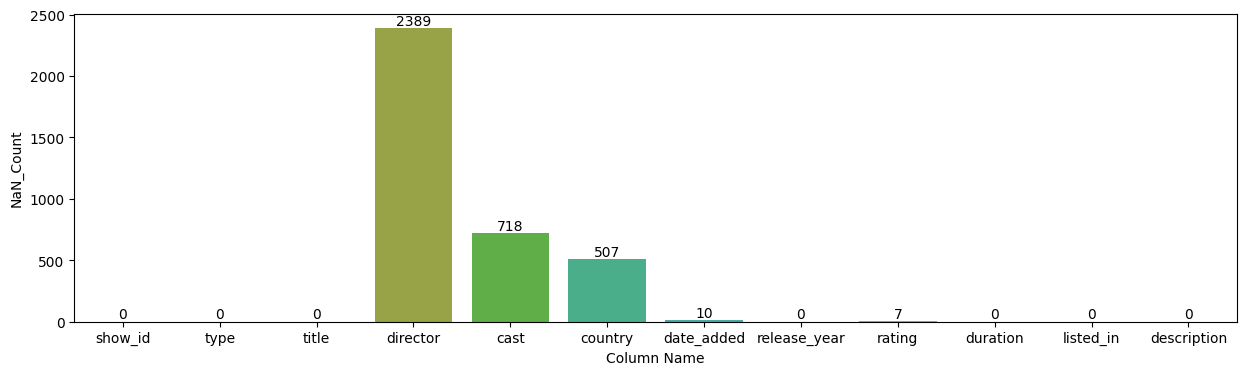

In [163]:
# Visualizing the missing values

missing_nan = Netflix_df.isnull().sum().reset_index()  #storing the data as a dataframe
missing_nan.rename(columns = {'index':'Column Name',0:'NaN_Count'}, inplace = True)

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

vis = sns.barplot(data=missing_nan, x="Column Name", y="NaN_Count")

vis.set_xticklabels(labels=missing_nan['Column Name'])  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)


# Show the plot
plt.show()

### What did you know about your dataset?

Answer Here

## ***2. Understanding Your Variables***

In [164]:
# Dataset Columns
Netflix_df.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [165]:
# Dataset Describe
Netflix_df.describe()

,release_year
count,7787.000000
mean,2013.932580
std,8.757395
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2018.000000
max,2021.000000


### Variables Description

Answer Here

### Check Unique Values for each variable.

In [166]:
# Check Unique Values for each variable.
from prettytable import PrettyTable #importing PrettyTable for tabular visualatization of data
tab = PrettyTable()

tab.field_names = ["Variable", "No. of Unique Values","Unique Values"]

# checking uniquw values for only categorical variable
cat= ['rating','type']

for x in Netflix_df[cat]:
  tab.add_row([x, Netflix_df[x].nunique(),Netflix_df[x].unique()])

tab.align["Variable"] = "l" #setting alingment of Column to left


print(tab)

+----------+----------------------+--------------------------------------------------------------------------+
| Variable | No. of Unique Values |                              Unique Values                               |
+----------+----------------------+--------------------------------------------------------------------------+
| rating   |          14          | ['TV-MA' 'R' 'PG-13' 'TV-14' 'TV-PG' 'NR' 'TV-G' 'TV-Y' nan 'TV-Y7' 'PG' |
|          |                      |                       'G' 'NC-17' 'TV-Y7-FV' 'UR']                       |
| type     |          2           |                           ['TV Show' 'Movie']                            |
+----------+----------------------+--------------------------------------------------------------------------+


## 3. ***Data Wrangling***

### Data Wrangling Code

>  <h4> <b> 1. Dropping Columns </b> </h4>


<h5> <i> <b>show_id </b>:   each cell represents an ID associated with a show and title. For Data Analysis and Preprocessing the column isn't important.

<h5> <i> <b>date_added </b>: The column represents the date when a show or movie was added on the Netflix Platform.

In [167]:
Netflix_df = Netflix_df.drop(['show_id','date_added'], axis=1)
Netflix_df.head(5)

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,TV Show,3%,NaN,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,TV-MA,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,TV-MA,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,R,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,PG-13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,PG-13,123 min,Dramas,A brilliant group of students become card-coun...


>  <h4> <b> 2. Handling Missing/ Null Values

In [168]:
def missing_values(df) :
  print("Columns with Null value , their count and Ratio\n")
  headers = ["Column", "Count" , "Ratio"]

  na_columns_ =[col for col in df.columns if df[col].isnull().sum() > 0]

  if len(na_columns_) != 0 :
    n_miss = df[na_columns_].isnull().sum().sort_values(ascending = True)
    ratio_ = (df[na_columns_].isnull().sum() / df.shape[0] * 100).sort_values(ascending = True)
    table = [[m,n,o]for m,n,o  in zip(n_miss.index,n_miss,ratio_) if n != 0]
    print(tabulate(table, headers, tablefmt="github"))

  else :
    return df.isnull().sum()

missing_values(Netflix_df)

Columns with Null value , their count and Ratio

| Column   |   Count |      Ratio |
|----------|---------|------------|
| rating   |       7 |  0.0898934 |
| country  |     507 |  6.51085   |
| cast     |     718 |  9.2205    |
| director |    2389 | 30.6793    |


#### **• rating** - replacing the null values with mode value of rating since  rating is a categorical column

In [169]:
#Replacing the null values with mode value of rating since  rating is a categorical column
Mode_Value = Netflix_df['rating'].mode()[0]
Netflix_df['rating'] = Netflix_df['rating'].fillna(Mode_Value)

#### **• Replacing missing values of country , cast and directory with Not Available**

In [170]:
Netflix_df[['director','cast','country']] = Netflix_df[['director','cast','country']].fillna('Not Available')
missing_values(Netflix_df)

Columns with Null value , their count and Ratio



type            0
title           0
director        0
cast            0
country         0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

>  <h4> <b> 3. Studying the Variables

#### **i. title** - represents the name of the movie/show

In [171]:
Netflix_df['title'].head(50)

0                                      3%
1                                    7:19
2                                   23:59
3                                       9
4                                      21
5                                      46
6                                     122
7                                     187
8                                     706
9                                    1920
10                                   1922
11                                   1983
12                                   1994
13                                  2,215
14                                   3022
15                                 Oct-01
16                                 Feb-09
17                                 22-Jul
18                                 15-Aug
19                                    '89
20                   ​​Kuch Bheege Alfaaz
21                           ​Goli Soda 2
22                     ​Maj Rati ​​Keteki
23                            ​May

><h5> <i> title columns contain movie name in english as well as in non-english characters.

#### **ii. Country** - represents the name of the country where the movie/show is produced.

In [172]:
Netflix_df['country']

0                                                  Brazil
1                                                  Mexico
2                                               Singapore
3                                           United States
4                                           United States
                              ...                        
7782    Sweden, Czech Republic, United Kingdom, Denmar...
7783                                                India
7784                                        Not Available
7785                                            Australia
7786                United Kingdom, Canada, United States
Name: country, Length: 7787, dtype: object

><h5> <i> there are rows which shows that a show or movie was produced in multiple countries

In [173]:

#Function to get the type  of element presnet in a text column
def str_to_list_set(col):
  list1 = [x for x in col]
  list2 = ','.join(list1).split(',')
  list3 = [ x.strip() for x in list2 ]

  return set(list3)

In [174]:
Countries =  str_to_list_set(Netflix_df['country'])

print("Number of Countries where a show/movie is produced : " ,len(Countries) )

Number of Countries where a show/movie is produced :  119


#### **ii. listed_in** - Genre of the show/movie

><h5> <i> A movie produced can be based on single or multiple type of Genre.

In [175]:
genre_type =  str_to_list_set(Netflix_df['listed_in'])

print("Total Types of Genre present : " ,len(genre_type) )

Total Types of Genre present :  42


#### **ii. rating** - TV rating of the show

In [176]:
Netflix_df['rating'].unique()

array(['TV-MA', 'R', 'PG-13', 'TV-14', 'TV-PG', 'NR', 'TV-G', 'TV-Y',
       'TV-Y7', 'PG', 'G', 'NC-17', 'TV-Y7-FV', 'UR'], dtype=object)

><h5>  Netflix uses a maturity rating system based on content such as violence, language, and substance use.</h5>
<b> TV Ratings (Television Parental Guidelines): </b><ul><li>TV-Y: Suitable for all ages. </li><li>TV-Y7: Suitable for ages 7 and above.</li><li>TV-G: Suitable for general audiences.</li><li>TV-PG: Parental guidance suggested.</li><li>TV-14: Parents strongly cautioned</li><li>TV-MA: Mature audience only.</li> </ul><b> Movie Ratings (Motion Picture Association of America): </b><ul><li>G: General audiences.</li><li>PG: Parental guidance suggested.</li><li>PG-13: Parents strongly cautioned.</li><li>R: Restricted. Under 17 requires accompanying parent or adult guardian.</li><li>NC-17: No children under 17. Adult content.</li></ul><b><h5> Other Ratings:  </b></h5><ul><li>NR: Not rated. </li><li>UR: Unrated.</li><li>TV-Y7-FV: Fantasy or violence suitable for ages 7 and above.

In [177]:
# Create a mapping for the ratings
rating_mapping = {'TV-MA': 18, 'R': 17, 'PG-13': 13, 'TV-14': 14, 'TV-PG': 12, 'NR': 0, 'TV-G': 0, 'TV-Y': 0, 'TV-Y7': 7, 'PG': 12, 'G': 0, 'NC-17': 17, 'TV-Y7-FV': 7, 'UR': 0}

Netflix_df['rating'] = Netflix_df['rating'].map(rating_mapping)
Netflix_df.head()

,type,title,director,cast,country,release_year,rating,duration,listed_in,description
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,18,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,18,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,17,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow..."
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi..."
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,13,123 min,Dramas,A brilliant group of students become card-coun...


#### **iii. duration** - Genre of the show/movie

In [178]:
Netflix_df[['type','duration']]

,type,duration
0,TV Show,4 Seasons
1,Movie,93 min
2,Movie,78 min
3,Movie,80 min
4,Movie,123 min
...,...,...
7782,Movie,99 min
7783,Movie,111 min
7784,Movie,44 min
7785,TV Show,1 Season


> <h5> <i> Converting the duration column into bins of interval 10 for Movie

In [179]:
import re

# Function to convert durations to bins of 10 minutes
def convert_to_bins(duration):
    if 'min' in duration:
        # Extract the numeric value from the duration
        minutes = int(re.search(r'\d+', duration).group())
        # Convert to bins of 10 minutes
        bins = (minutes // 10) * 10
        return f'{bins}-{bins+9} min'
    else:
        return duration

# Apply the function to the 'duration' column
Netflix_df['duration2'] = Netflix_df['duration'].apply(convert_to_bins)

In [180]:
Netflix_df

,type,title,director,cast,country,release_year,rating,duration,listed_in,description,duration2
0,TV Show,3%,Not Available,"João Miguel, Bianca Comparato, Michel Gomes, R...",Brazil,2020,18,4 Seasons,"International TV Shows, TV Dramas, TV Sci-Fi &...",In a future where the elite inhabit an island ...,4 Seasons
1,Movie,7:19,Jorge Michel Grau,"Demián Bichir, Héctor Bonilla, Oscar Serrano, ...",Mexico,2016,18,93 min,"Dramas, International Movies",After a devastating earthquake hits Mexico Cit...,90-99 min
2,Movie,23:59,Gilbert Chan,"Tedd Chan, Stella Chung, Henley Hii, Lawrence ...",Singapore,2011,17,78 min,"Horror Movies, International Movies","When an army recruit is found dead, his fellow...",70-79 min
3,Movie,9,Shane Acker,"Elijah Wood, John C. Reilly, Jennifer Connelly...",United States,2009,13,80 min,"Action & Adventure, Independent Movies, Sci-Fi...","In a postapocalyptic world, rag-doll robots hi...",80-89 min
4,Movie,21,Robert Luketic,"Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...",United States,2008,13,123 min,Dramas,A brilliant group of students become card-coun...,120-129 min
...,...,...,...,...,...,...,...,...,...,...,...
7782,Movie,Zozo,Josef Fares,"Imad Creidi, Antoinette Turk, Elias Gergi, Car...","Sweden, Czech Republic, United Kingdom, Denmar...",2005,18,99 min,"Dramas, International Movies",When Lebanon's Civil War deprives Zozo of his ...,90-99 min
7783,Movie,Zubaan,Mozez Singh,"Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...",India,2015,14,111 min,"Dramas, International Movies, Music & Musicals",A scrappy but poor boy worms his way into a ty...,110-119 min
7784,Movie,Zulu Man in Japan,Not Available,Nasty C,Not Available,2019,18,44 min,"Documentaries, International Movies, Music & M...","In this documentary, South African rapper Nast...",40-49 min
7785,TV Show,Zumbo's Just Desserts,Not Available,"Adriano Zumbo, Rachel Khoo",Australia,2019,12,1 Season,"International TV Shows, Reality TV",Dessert wizard Adriano Zumbo looks for the nex...,1 Season


### What all manipulations have you done and insights you found?

<ul> <h3> <font color ="#1C2833"> <b> Manipulations performed on the data <br> ---------------------------------------------------------------</b></h3>

>   <b> 1. Dropping Columns :</b> show_id and date_added columns were dropped <br><b>2. Updated the missing values :</b> rating ,cast , director and country contained missing values. Replaced the missing values.  <br> <br> <b>Insights Found</b> <br> <ul><li> title columns contain movie name in english as well as in non-english characters.</li><li> A movie produced can be based on single or multiple type of Genre. There are total 42 types of Genre present</li><li> there are rows which shows that a show or movie was produced in multiple countries.</li><li>Total 119 countries were involved for producing   show or movie:  119</li>

## ***4. Data Vizualization, Storytelling & Experimenting with charts : Understand the relationships between variables***

#### Chart - 1

>  <h3> <b> <font color ="#333"> Distribution of  'type' column  </div> </b>

In [203]:
# Chart - 1 visualization code
def count_plot(Column, title , xlabel , ylabel):
  # Get the counts of each category
  category_counts = Column.value_counts()

  # Sort the categories by count in descending order
  sorted_categories = category_counts.index

  fig, ax = plt.subplots(figsize=(8, 6))
  bar_plot3 = sns.countplot(x =Column , order=sorted_categories )

  for i in bar_plot3.containers: # displaying the count number on top of each bar
      bar_plot3.bar_label(i , size='small')

  total = len(Column)
  for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() +0.3+ p.get_width() / 2, height , f"{height/total:.2%}", ha="center")

  plt.title(title, fontsize=12, fontweight=0, loc='center' , style='normal' )
  plt.xlabel(xlabel)
  plt.ylabel( ylabel)

  plt.show()

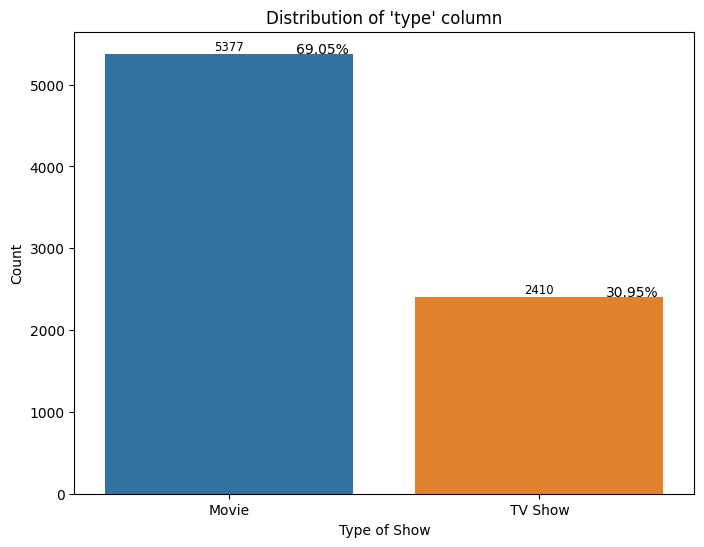

In [204]:
count_plot(Netflix_df['type'],"Distribution of 'type' column",'Type of Show','Count')

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 2

>  <h3> <b> <font color ="#333">  Most prolific directors in terms of the number of movies or TV shows available on Netflix?  </div> </b>

In [57]:
Director_Count = Netflix_df['director'].value_counts().reset_index() #storing the data as a dataframe
Director_Count.rename(columns = {'index':'Director','director':'No of TV Shows/Movies'}, inplace = True)
Top_Directors = Director_Count[(Director_Count['No of TV Shows/Movies'] >= 8) & (Director_Count['Director'] != 'Not Available') ]
Top_Directors

,Director,No of TV Shows/Movies
1,"Raúl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Jay Karas,14
4,Cathy Garcia-Molina,13
5,Jay Chapman,12
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Steven Spielberg,10
9,David Dhawan,9
10,Lance Bangs,8


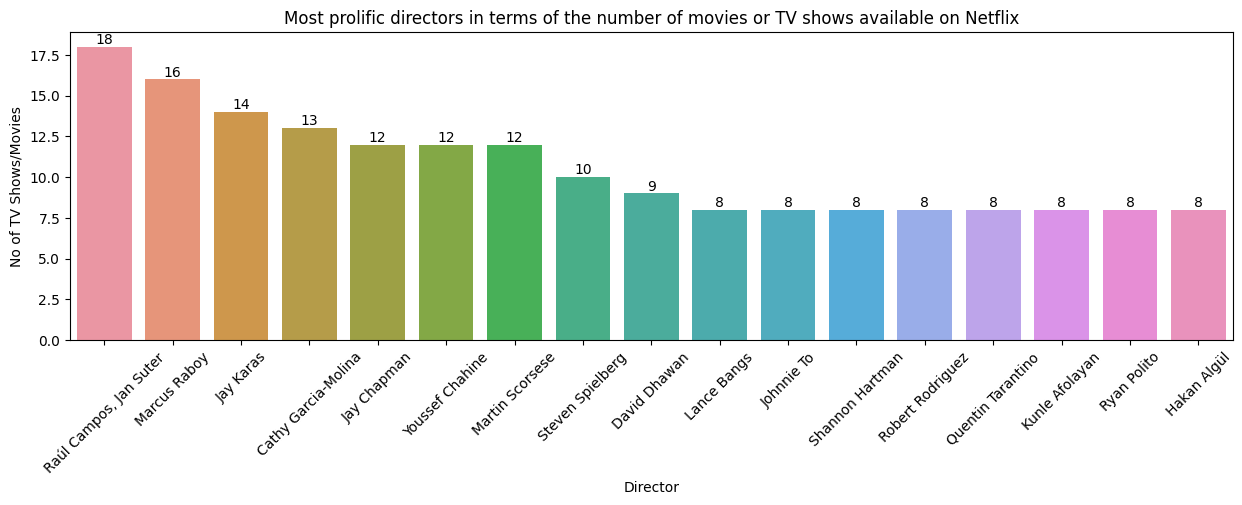

In [58]:
# Chart - 2 visualization code

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

vis = sns.barplot(data=Top_Directors, x="Director", y="No of TV Shows/Movies")

vis.set_xticklabels(labels=Top_Directors['Director'], rotation=45)  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)

plt.title('Most prolific directors in terms of the number of movies or TV shows available on Netflix', fontsize=12, fontweight=0, loc='center' , style='normal' )


# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 3

>  <h3> <b> <font color ="#333">Countries where more than 100 TV Shows/ Movies are produce  </div> </b>

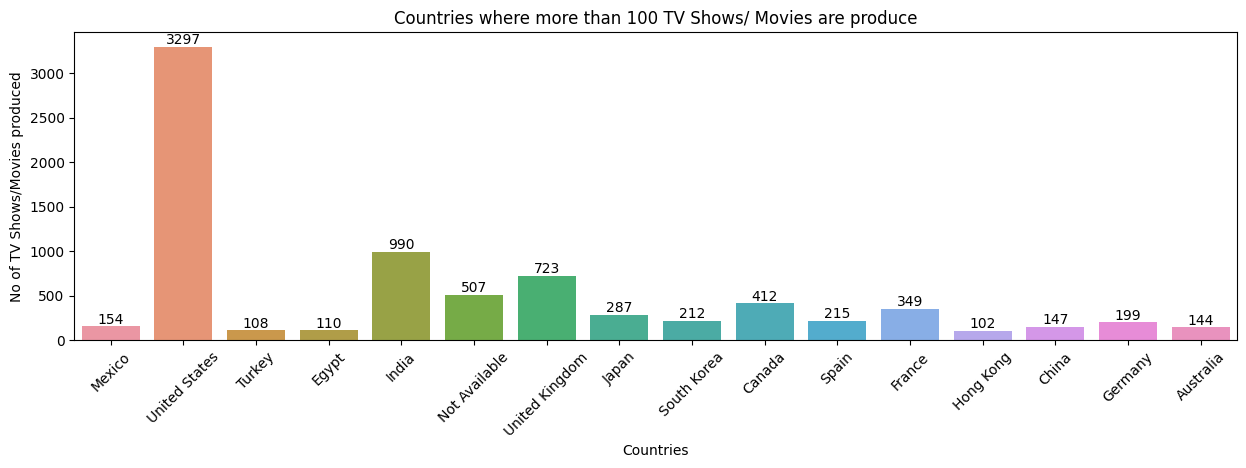

In [59]:
# Chart - 3 visualization code
from collections import Counter

# Extract individual country names
country_list = [country.strip() for countries in Netflix_df['country'] for country in countries.split(',')]

# Count occurrences using Counter
country_counts = Counter(country_list)
Top10_country_count = {country:  count for country, count in country_counts.items() if count > 100}

# Convert the dictionary items to lists for plotting
countries = list(Top10_country_count.keys())
counts = list(Top10_country_count.values())

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

vis = sns.barplot( x= countries, y= counts)

vis.set_xticklabels(labels= countries , rotation=45)  #rotaating X_labels

for i in vis.containers: # displaying the count number on top of each bar
    vis.bar_label(i)

plt.title('Countries where more than 100 TV Shows/ Movies are produce', fontsize=12, fontweight=0, loc='center' , style='normal' )
plt.xlabel('Countries')
plt.ylabel( 'No of TV Shows/Movies produced')

# Show the plot
plt.show()


##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 4

>  <h3> <b> <font color ="#333">Distribution of movie and TV show releases over the years on Netflix </div> </b>

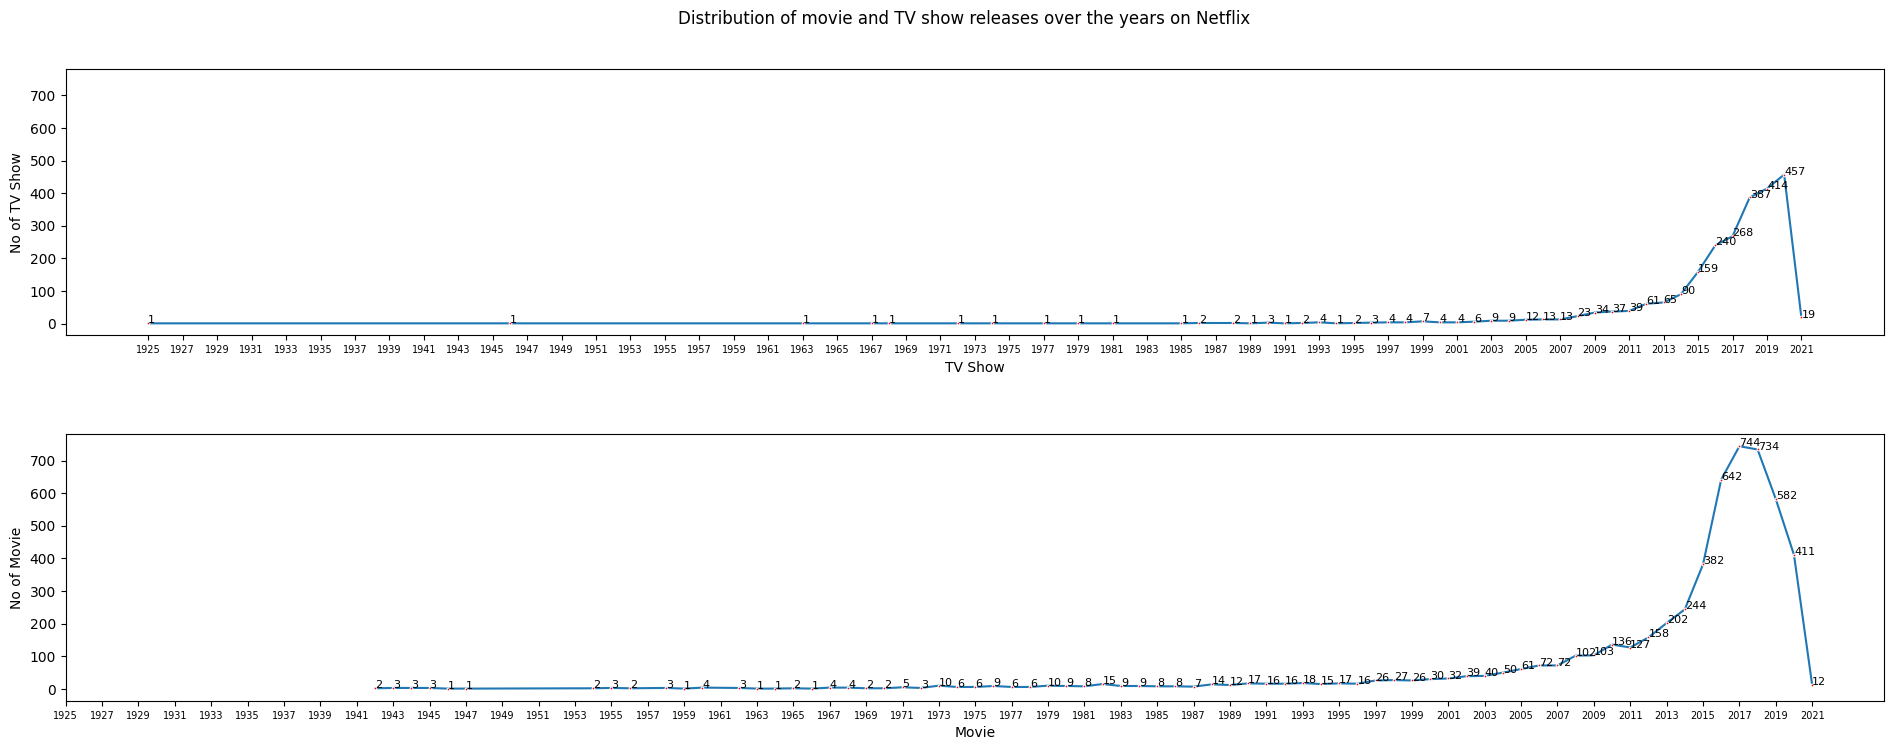

In [60]:
# Chart - 4 visualization code

#Grouping the data by type of TV Show and Movie
Year_grpby = Netflix_df.groupby(['type','release_year']).aggregate({'release_year':'count'})
Year_grpby.rename(columns= {'release_year':'count'},inplace=True)
Year_grpby.reset_index(drop = False, inplace= True)

fig, axes = plt.subplots(2, 1, figsize=(20,8), sharey=True) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Distribution of movie and TV show releases over the years on Netflix')


i = 0
for n in Netflix_df['type'].unique():
  typ = Year_grpby[Year_grpby['type'] ==  n]
  plot1 = sns.lineplot(ax=axes[i], data = typ, x = 'release_year',y='count' , marker='o', markersize=2, markerfacecolor='red' )

  #Labling values on the top of the lines
  for m, txt in enumerate(typ['release_year']):
     plot1.text(typ['release_year'].iloc[m], typ['count'].iloc[m], str(typ['count'].iloc[m]) , fontsize = 8)
  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)

  i = i+ 1

# Set the x-axis interval to 5 for both subplots
for ax in axes:
    ax.set_xticks(range(min(Year_grpby['release_year']), max(Year_grpby['release_year']) + 1, 2))
    ax.tick_params(axis='x', labelsize=7)  # Adjust the font size

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 5

><h3> <b> <font color ="#333"> Overall distribution of ratings for Netflix content </div> </b> </div> </b>

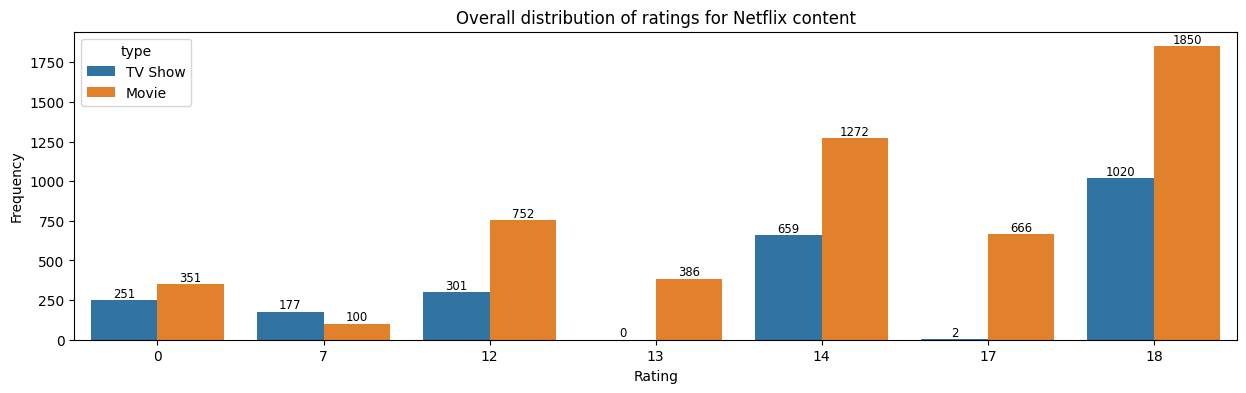

In [61]:
# Chart - 5 visualization code

# setting the dimensions of the plot
fig, ax = plt.subplots(figsize=(15, 4))

# Create a histogram
plot3 = sns.countplot(data = Netflix_df, x='rating',hue = 'type' )

#Display count values each bar
for container in plot3.containers:
    plot3.bar_label(container, size='small')


# Add labels and title
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.title('Overall distribution of ratings for Netflix content')

# Show the plot
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 6

><h3> <b> <font color ="#333"> Most common genres/categories of content available on Netflix </div> </b> </div> </b>

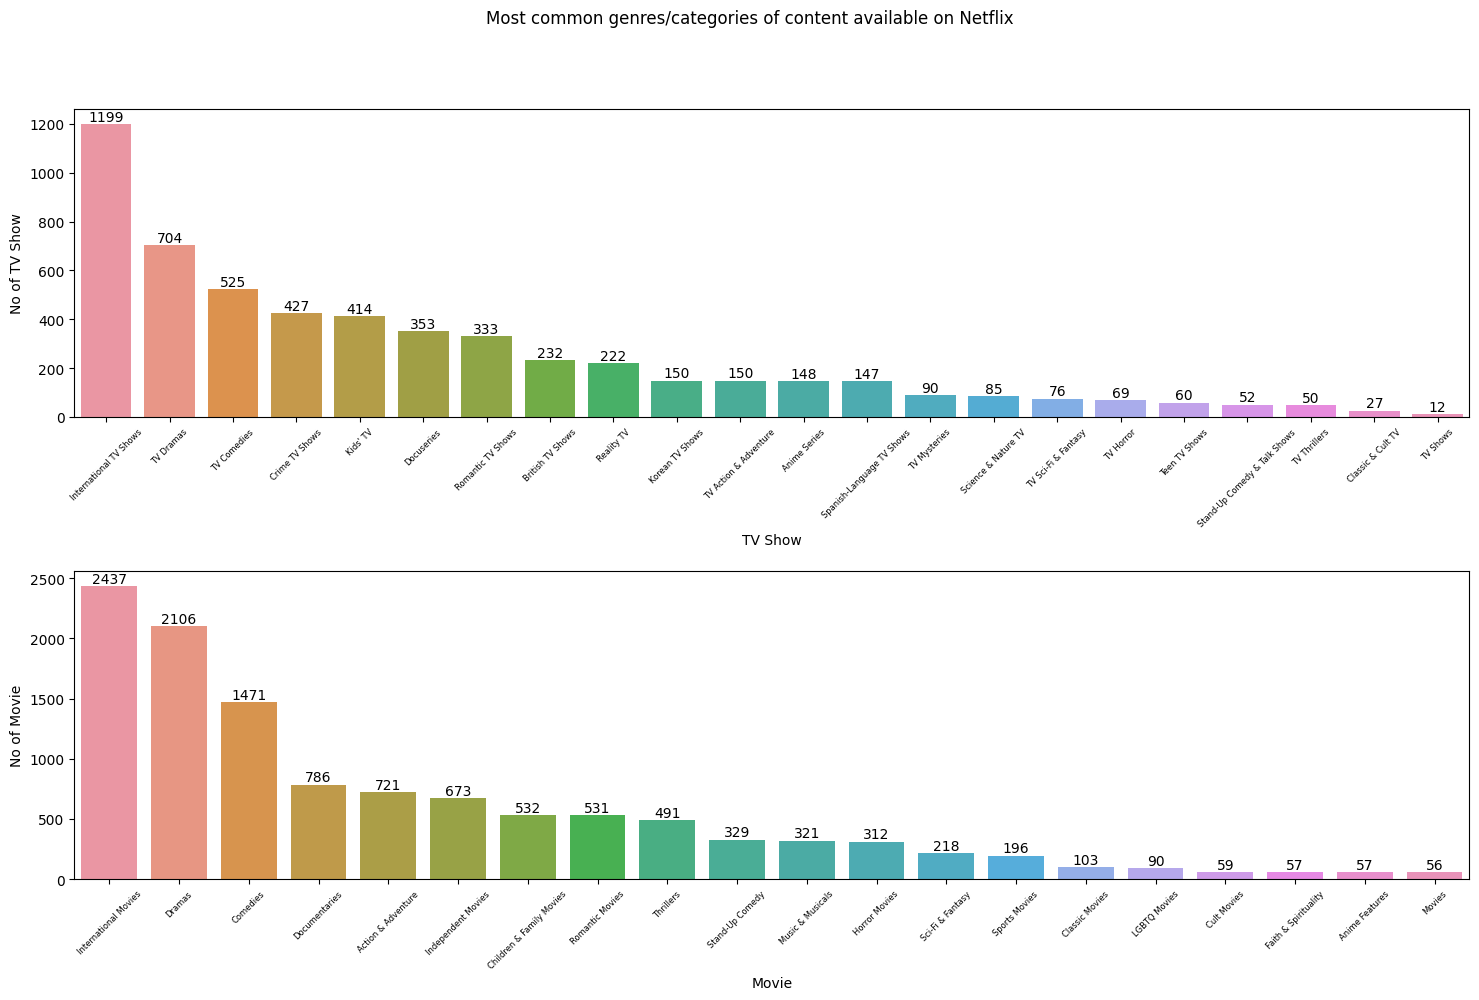

In [62]:
# Chart - 6 visualization code

def Count_func( col):
  # Extract individual element names
  lst = [country.strip() for countries in col for country in countries.split(',')]

  # Count occurrences using Counter
  counts = Counter(lst)
  count_dict = dict(sorted(counts.items(), key=lambda item: item[1], reverse=True))
  return counts


fig, axes = plt.subplots(2, 1, figsize=(18,10)) #displaying two subplots in a same plot


i = 0
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]

  genre_count = Count_func( typ['listed_in'])
  count_dict = dict(sorted(genre_count.items(), key=lambda item: item[1], reverse=True))

  # Convert the dictionary items to lists for plotting
  genre = list(count_dict.keys())
  count = list(count_dict.values())

  plot1 = sns.barplot(ax=axes[i], x= genre, y= count)

  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)
  plot1.set_xticklabels(labels= genre , rotation=45)  #rotaating X_labels


  # Adjust x-axis label size
  plot1.tick_params(axis='x', labelsize=6)
  plot1.bar_label(plot1.containers[0])

  i = i+ 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Most common genres/categories of content available on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 7

><h3> <b> <font color ="#333"> Distribution of movie and TV show durations on Netflix </div> </b> </div> </b>

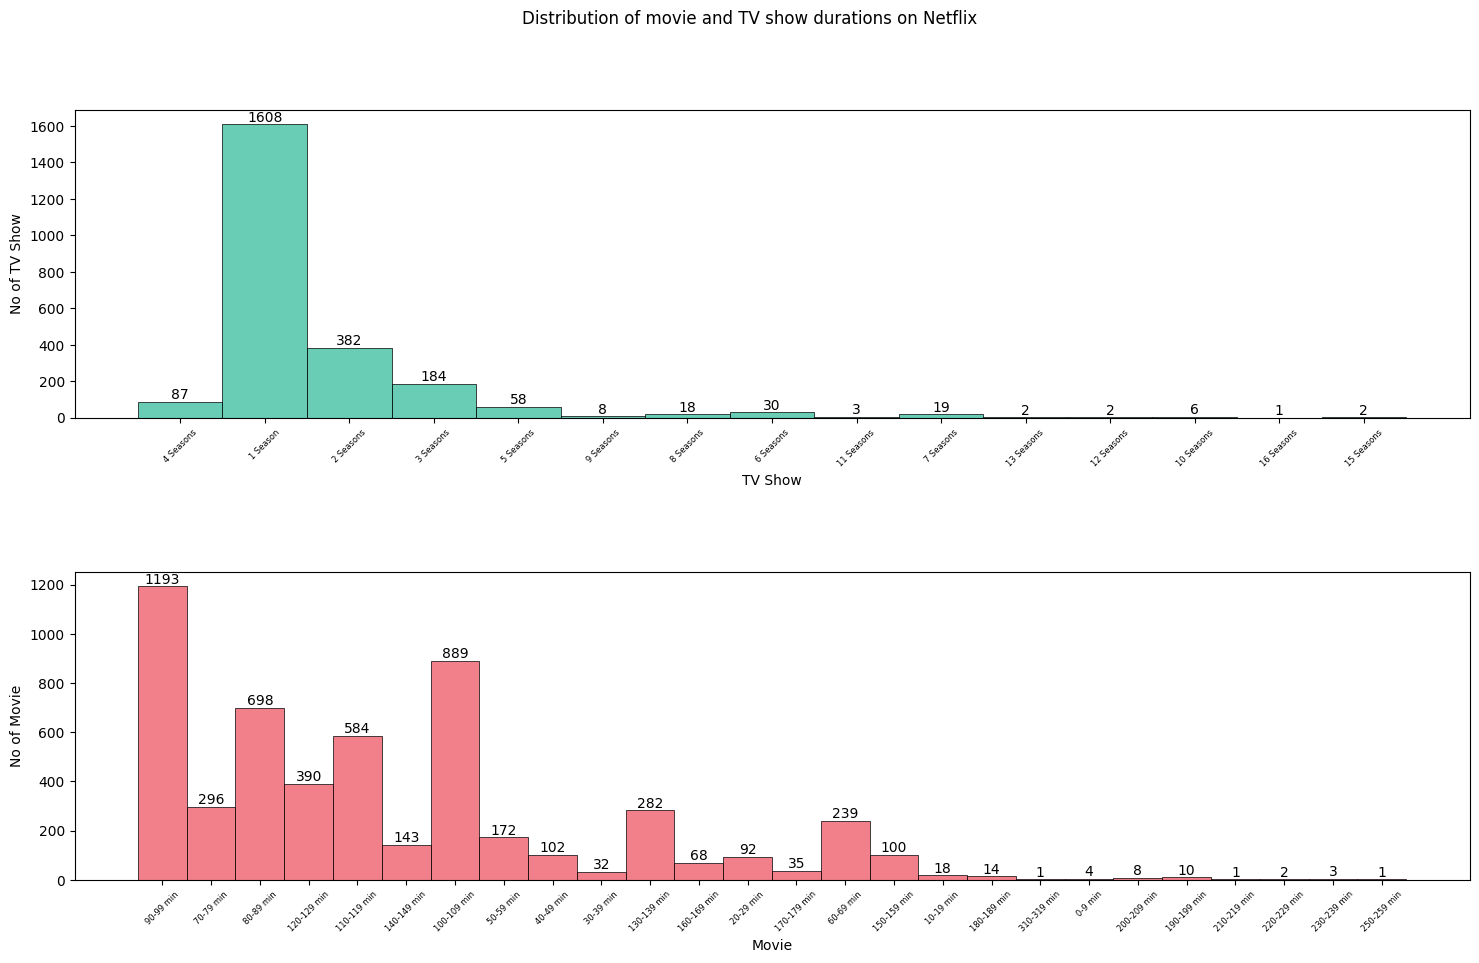

In [221]:
# Chart - 7 visualization code
fig, axes = plt.subplots(2, 1, figsize=(18,10)) #displaying two subplots in a same plot

i = 0
color = ['#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]
  plot1 = sns.histplot(ax=axes[i],data = typ, x= 'duration2' ,bins = 10,element='bars', color = color[i], linewidth=0.5)

  plot1.set_xlabel(n)
  plot1.set_ylabel("No of " + n)

  # Rotate x-axis labels for the plot
  axes[i].tick_params(axis='x', rotation=45)

  # Adjust x-axis label size
  plot1.tick_params(axis='x', labelsize=6)
  plot1.bar_label(plot1.containers[0])

  i = i+ 1

# Adjust spacing between subplots
plt.subplots_adjust(hspace=0.5)
fig.suptitle('Distribution of movie and TV show durations on Netflix')
plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 8

><h3> <b> <font color ="#333"> Average Rating of Netflix content  over different release years </div> </b> </div> </b>

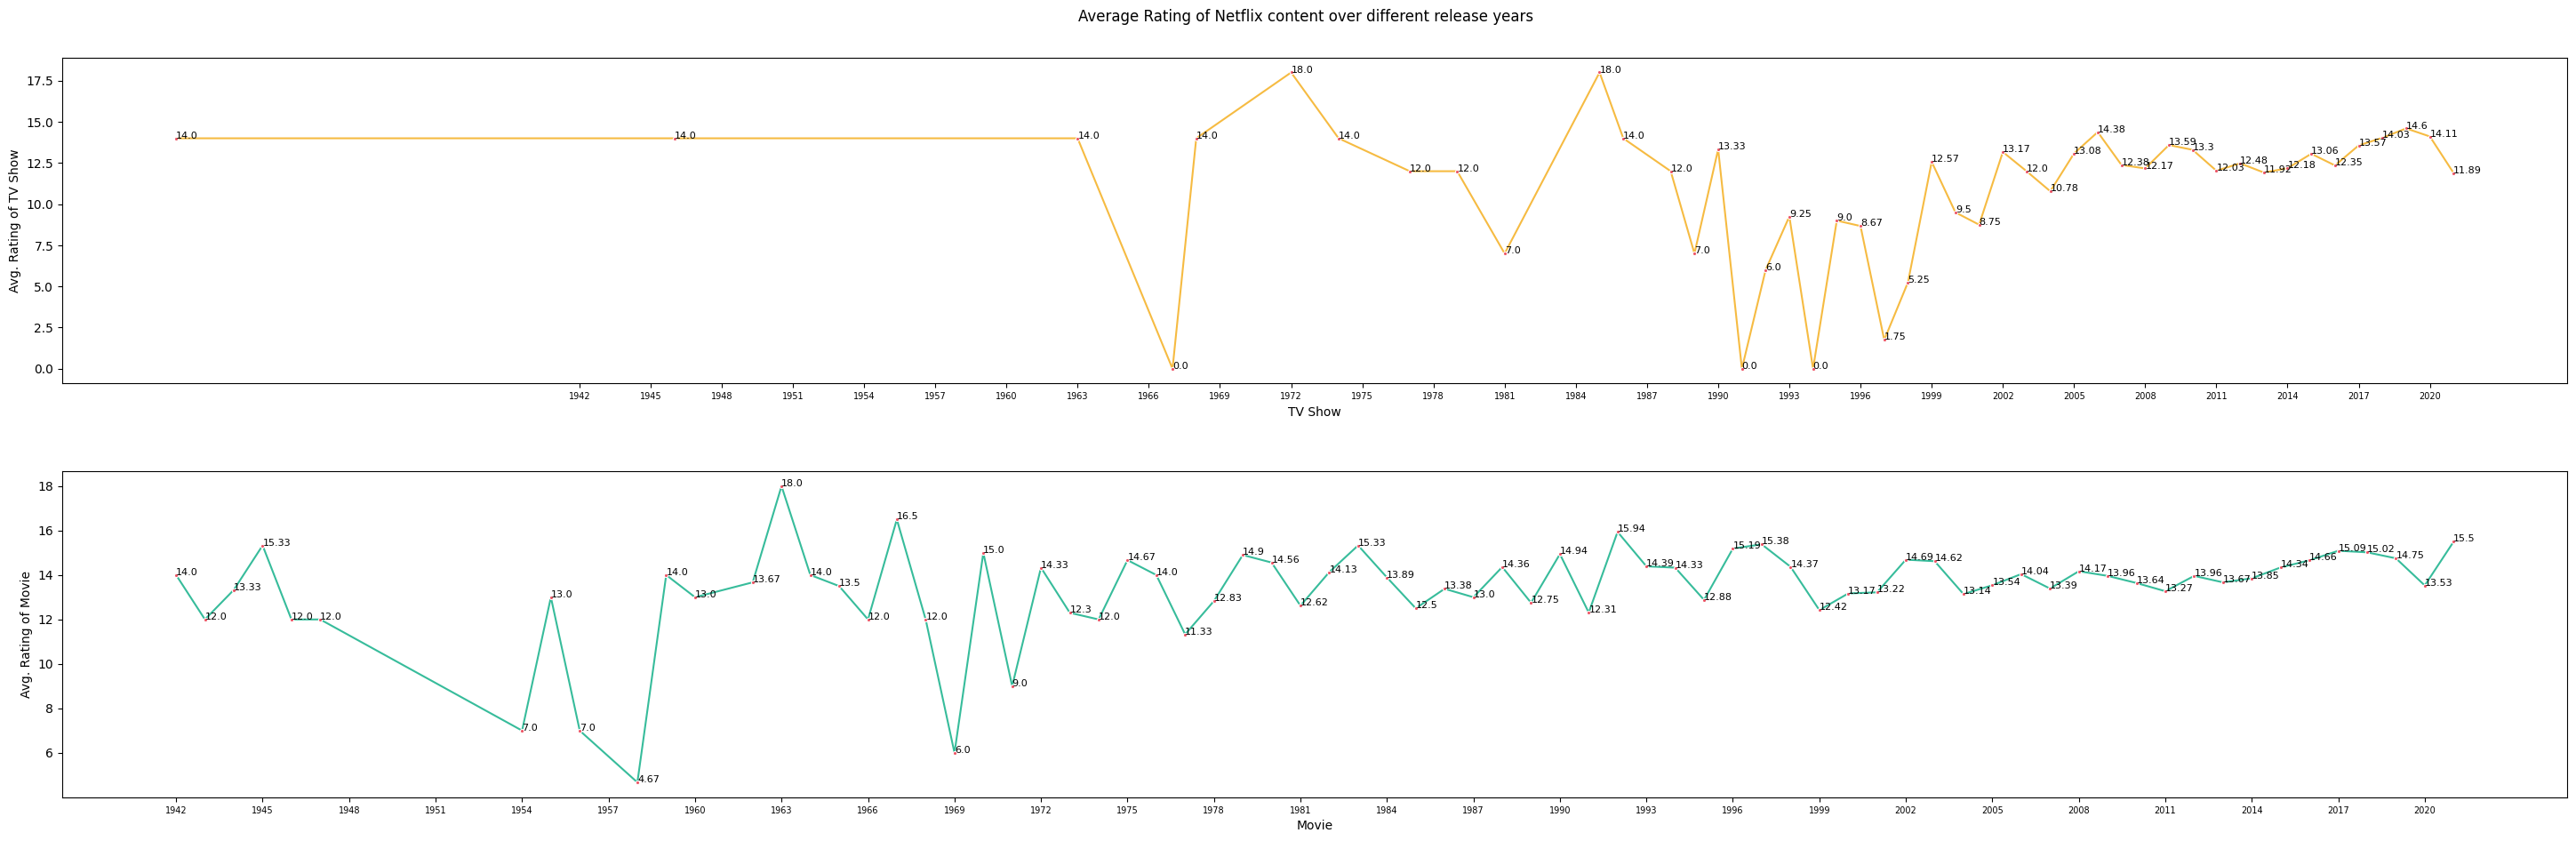

In [117]:
# Chart - 8 visualization code


# Calculate the average rating for each year
average_ratings = Netflix_df.groupby(['type','release_year'])['rating'].mean().reset_index()

# Round the mean values to the first digit after the decimal point
average_ratings['rating'] = average_ratings['rating'].round(2)

fig, axes = plt.subplots(2, 1, figsize=(30,10)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Average Rating of Netflix content over different release years')


i = 0
color = ['#F6BB42','#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = average_ratings[average_ratings['type'] ==  n]

  plot1 = sns.lineplot(ax=axes[i], data = typ, x = 'release_year',y='rating' , marker='o', markersize=3, markerfacecolor='#ED5565' ,color = color[i] )

  #Labling values on the top of the lines
  for m, txt in enumerate(typ['release_year']):
     plot1.text(typ['release_year'].iloc[m], typ['rating'].iloc[m], str(typ['rating'].iloc[m]) , fontsize = 8)
  plot1.set_xlabel(n)
  plot1.set_ylabel("Avg. Rating of " + n)

  i = i+ 1

# Set the x-axis interval to 5 for both subplots
for ax in axes:
    ax.set_xticks(range(min(typ['release_year']), max(typ['release_year']) + 1, 3))
    ax.tick_params(axis='x', labelsize=7)  # Adjust the font size

plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 9

><h3> <b> <font color ="#333"> Correlation between content duration and viewer ratings</div> </b> </div> </b>

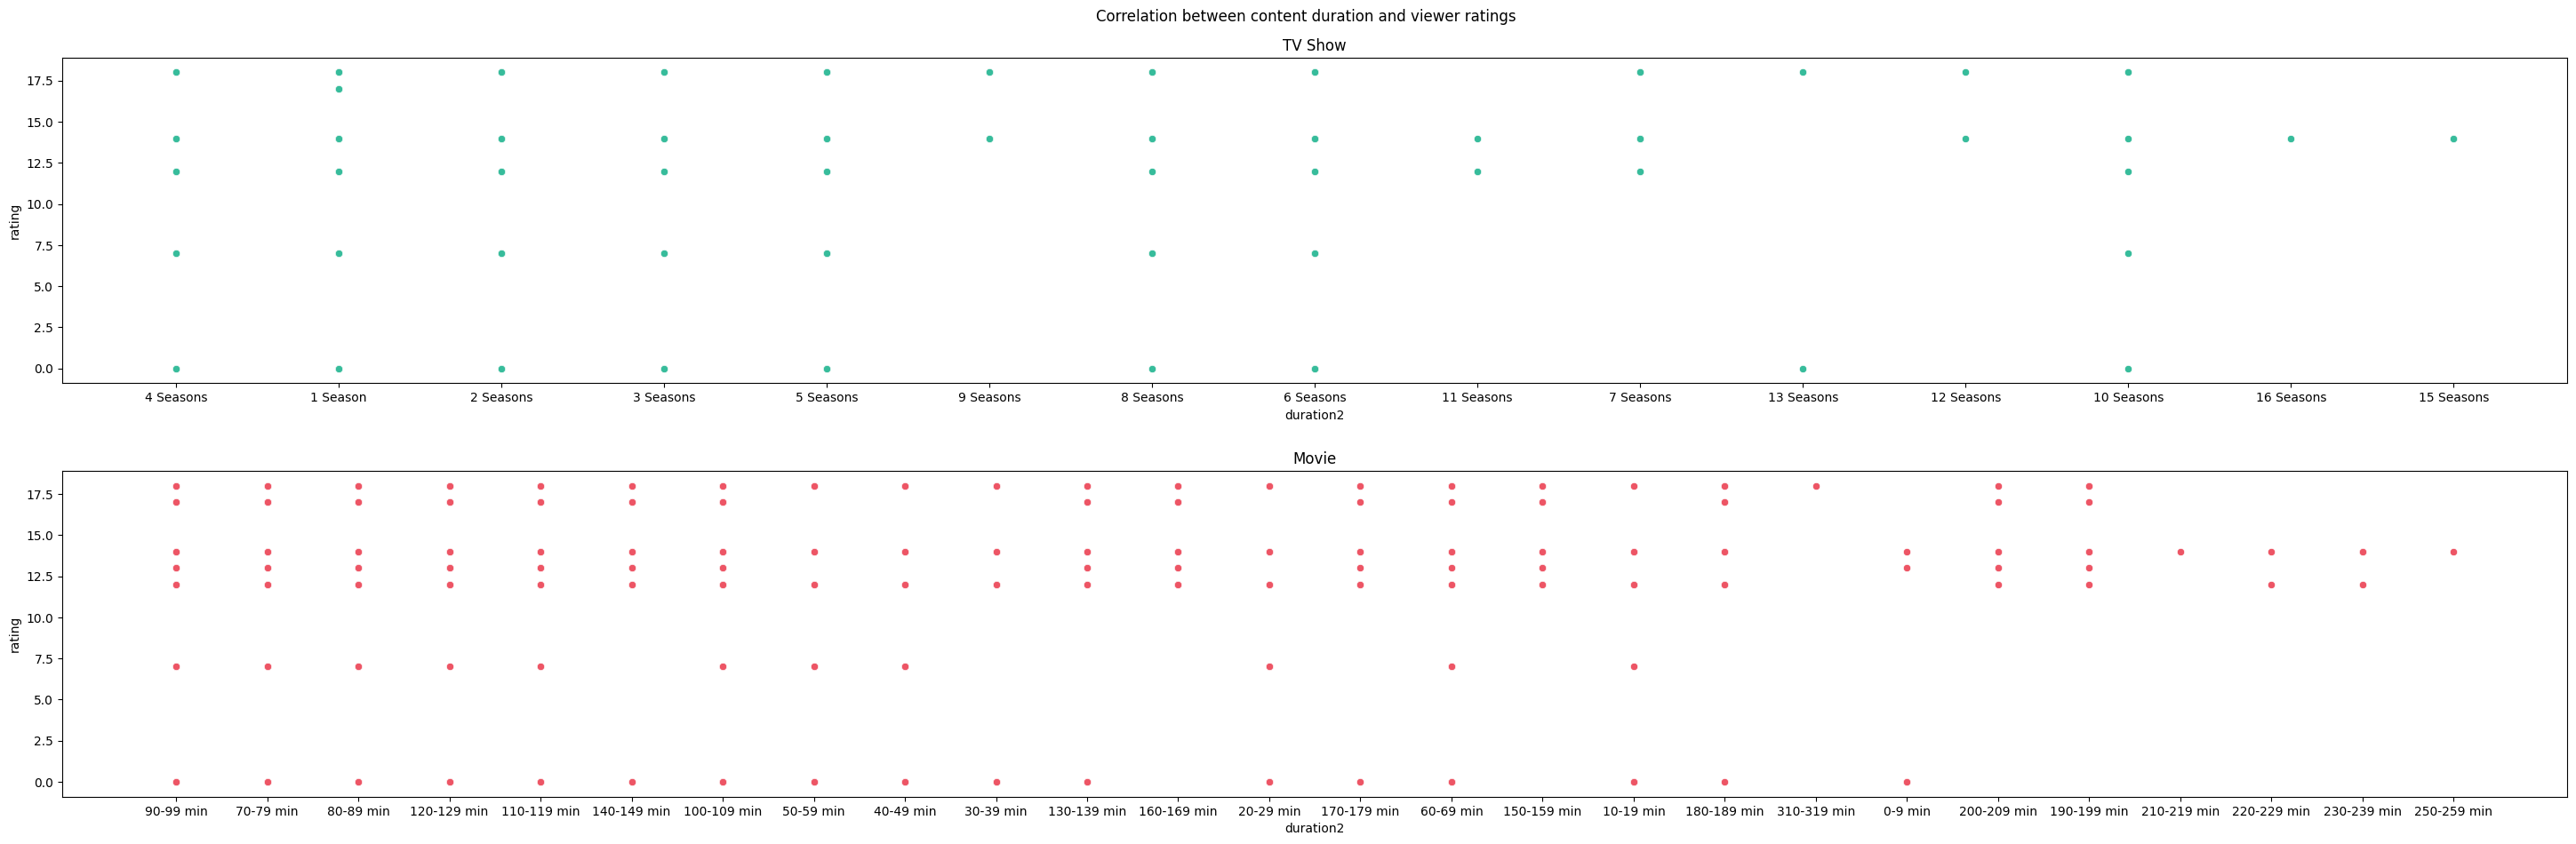

In [222]:
# Chart - 9 visualization code

fig, axes = plt.subplots(2, 1, figsize=(30,10)) #displaying two subplots in a single plot
fig.tight_layout(pad=5.0) #spacing between plots
fig.suptitle('Correlation between content duration and viewer ratings')


i = 0
color = ['#37BC9B','#ED5565']
for n in Netflix_df['type'].unique():
  typ = Netflix_df[Netflix_df['type'] ==  n]

  plot1 = sns.scatterplot(ax=axes[i], data = typ, x = 'duration2',y='rating', color = color[i])
  axes[i].set_title(n)

  i = i+ 1


plt.show()

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 10

><h3> <b> <font color ="#333"> How has the average duration of movies and TV shows changed over the years?


NameError: name 'df' is not defined

In [243]:
# Create a pivot table to calculate the average duration year-wise for each type
pivot_table = Avg_Year_Data.pivot_table(values='duration', index='release_year', columns='type', aggfunc='mean')
pivot_table

type,Movie,TV Show
release_year,,
1925,NaN,1.000000e+00
1942,2.609000e+03,NaN
1943,2.060817e+05,NaN
1944,1.346920e+05,NaN
1945,2.119773e+05,NaN
...,...,...
2017,inf,4.145941e+267
2018,inf,inf
2019,inf,inf


In [240]:
# Chart - 10 visualization code

#function to extract the numeric part from the duration column
def extract_num(value):
  num = value.split(' ')
  return num[0]


# Selectign the necessary columns
Avg_Year_Data = Netflix_df[['type','duration','release_year']]
Avg_Year_Data['duration'] = Avg_Year_Data['duration'].apply(extract_num)
Avg_Year_Data

# Calculate the average rating for each year
average_ratings = Avg_Year_Data[Avg_Year_Data['type'] == 'TV Show'].groupby(['type','release_year'])['duration'].mean()
average_ratings

type     release_year
TV Show  1925             1.000000e+00
         1946             1.000000e+00
         1963             4.000000e+00
         1967             8.000000e+00
         1968             3.000000e+00
         1972             1.000000e+00
         1974             4.000000e+00
         1977             1.000000e+01
         1979             1.000000e+00
         1981             1.000000e+00
         1985             1.000000e+00
         1986             3.050000e+01
         1988             7.500000e+00
         1989             1.000000e+00
         1990             5.066667e+01
         1991             1.000000e+00
         1992             5.550000e+02
         1993             1.777750e+03
         1994             1.000000e+00
         1995             6.000000e+00
         1996             3.700000e+01
         1997             5.285000e+02
         1998             1.284000e+03
         1999             3.024453e+05
         2000             1.529250e+03
   

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 11

In [ ]:
# Chart - 11 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 12

In [ ]:
# Chart - 12 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 13

In [ ]:
# Chart - 13 visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

##### 3. Will the gained insights help creating a positive business impact?
Are there any insights that lead to negative growth? Justify with specific reason.

Answer Here

#### Chart - 14 - Correlation Heatmap

In [ ]:
# Correlation Heatmap visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

#### Chart - 15 - Pair Plot

In [ ]:
# Pair Plot visualization code

##### 1. Why did you pick the specific chart?

Answer Here.

##### 2. What is/are the insight(s) found from the chart?

Answer Here

## ***5. Hypothesis Testing***

### Based on your chart experiments, define three hypothetical statements from the dataset. In the next three questions, perform hypothesis testing to obtain final conclusion about the statements through your code and statistical testing.

Answer Here.

### Hypothetical Statement - 1

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 2

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

### Hypothetical Statement - 3

#### 1. State Your research hypothesis as a null hypothesis and alternate hypothesis.

Answer Here.

#### 2. Perform an appropriate statistical test.

In [ ]:
# Perform Statistical Test to obtain P-Value

##### Which statistical test have you done to obtain P-Value?

Answer Here.

##### Why did you choose the specific statistical test?

Answer Here.

## ***6. Feature Engineering & Data Pre-processing***

### 1. Handling Missing Values

In [ ]:
# Handling Missing Values & Missing Value Imputation

#### What all missing value imputation techniques have you used and why did you use those techniques?

Answer Here.

### 2. Handling Outliers

In [ ]:
# Handling Outliers & Outlier treatments

##### What all outlier treatment techniques have you used and why did you use those techniques?

Answer Here.

### 3. Categorical Encoding

In [ ]:
# Encode your categorical columns

#### What all categorical encoding techniques have you used & why did you use those techniques?

Answer Here.

### 4. Textual Data Preprocessing
(It's mandatory for textual dataset i.e., NLP, Sentiment Analysis, Text Clustering etc.)

#### 1. Expand Contraction

In [ ]:
# Expand Contraction

#### 2. Lower Casing

In [ ]:
# Lower Casing

#### 3. Removing Punctuations

In [ ]:
# Remove Punctuations

#### 4. Removing URLs & Removing words and digits contain digits.

In [ ]:
# Remove URLs & Remove words and digits contain digits

#### 5. Removing Stopwords & Removing White spaces

In [ ]:
# Remove Stopwords

In [ ]:
# Remove White spaces

#### 6. Rephrase Text

In [ ]:
# Rephrase Text

#### 7. Tokenization

In [ ]:
# Tokenization

#### 8. Text Normalization

In [ ]:
# Normalizing Text (i.e., Stemming, Lemmatization etc.)

##### Which text normalization technique have you used and why?

Answer Here.

#### 9. Part of speech tagging

In [ ]:
# POS Taging

#### 10. Text Vectorization

In [ ]:
# Vectorizing Text

##### Which text vectorization technique have you used and why?

Answer Here.

### 4. Feature Manipulation & Selection

#### 1. Feature Manipulation

In [ ]:
# Manipulate Features to minimize feature correlation and create new features

#### 2. Feature Selection

In [ ]:
# Select your features wisely to avoid overfitting

##### What all feature selection methods have you used  and why?

Answer Here.

##### Which all features you found important and why?

Answer Here.

### 5. Data Transformation

#### Do you think that your data needs to be transformed? If yes, which transformation have you used. Explain Why?

In [ ]:
# Transform Your data

### 6. Data Scaling

In [ ]:
# Scaling your data

##### Which method have you used to scale you data and why?

### 7. Dimesionality Reduction

##### Do you think that dimensionality reduction is needed? Explain Why?

Answer Here.

In [ ]:
# DImensionality Reduction (If needed)

##### Which dimensionality reduction technique have you used and why? (If dimensionality reduction done on dataset.)

Answer Here.

### 8. Data Splitting

In [ ]:
# Split your data to train and test. Choose Splitting ratio wisely.

##### What data splitting ratio have you used and why?

Answer Here.

### 9. Handling Imbalanced Dataset

##### Do you think the dataset is imbalanced? Explain Why.

Answer Here.

In [ ]:
# Handling Imbalanced Dataset (If needed)

##### What technique did you use to handle the imbalance dataset and why? (If needed to be balanced)

Answer Here.

## ***7. ML Model Implementation***

### ML Model - 1

In [ ]:
# ML Model - 1 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### ML Model - 2

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

#### 3. Explain each evaluation metric's indication towards business and the business impact pf the ML model used.

Answer Here.

### ML Model - 3

In [ ]:
# ML Model - 3 Implementation

# Fit the Algorithm

# Predict on the model

#### 1. Explain the ML Model used and it's performance using Evaluation metric Score Chart.

In [ ]:
# Visualizing evaluation Metric Score chart

#### 2. Cross- Validation & Hyperparameter Tuning

In [ ]:
# ML Model - 3 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)

# Fit the Algorithm

# Predict on the model

##### Which hyperparameter optimization technique have you used and why?

Answer Here.

##### Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

Answer Here.

### 1. Which Evaluation metrics did you consider for a positive business impact and why?

Answer Here.

### 2. Which ML model did you choose from the above created models as your final prediction model and why?

Answer Here.

### 3. Explain the model which you have used and the feature importance using any model explainability tool?

Answer Here.

## ***8.*** ***Future Work (Optional)***

### 1. Save the best performing ml model in a pickle file or joblib file format for deployment process.


In [ ]:
# Save the File

### 2. Again Load the saved model file and try to predict unseen data for a sanity check.


In [ ]:
# Load the File and predict unseen data.

### ***Congrats! Your model is successfully created and ready for deployment on a live server for a real user interaction !!!***

# **Conclusion**

Write the conclusion here.

### ***Hurrah! You have successfully completed your Machine Learning Capstone Project !!!***